##Quantitative Analysis in the stock market is a financial methodology that utilizes mathematical and statistical techniques to analyze stocks and financial markets.

##Below is the process we can follow for the task of Quantitative Analysis of the stock market:

###Clearly define the objectives and questions to be answered.
Identify the key performance indicators (KPIs) relevant to the analysis.
Gather historical stock market data, including prices, volumes, and other relevant financial indicators.
Clean and preprocess the data to handle missing values, outliers, and errors.
Conduct initial analysis to understand data distributions, patterns, and correlations.
Implement various strategies based on quantitative analysis.

#Importing Necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
from google.colab import files
uploaded=files.upload()

Saving stocks.csv to stocks.csv


In [3]:
df=pd.read_csv("stocks.csv")

In [4]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.set_index('Date', inplace=True)

In [7]:
df.head()

,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


#The dataset contains the following columns for stock market data:

##Ticker: The stock ticker symbol.
##Date: The trading date.
##Open: The opening price of the stock for the day.
##High: The highest price of the stock during the day.
##Low: The lowest price of the stock during the day.
##Close: The closing price of the stock for the day.
##Adj Close: The adjusted closing price, which accounts for all corporate actions such as dividends, stock splits, etc.
##Volume: The number of shares traded during the day.

#To perform a quantitative analysis, we can explore various statistical concepts like descriptive statistics, time series analysis, correlation analysis, and more. Here are some potential analyses we can perform:

##Descriptive Statistics: Summary statistics (mean, median, standard deviation, etc.) for each stock.
##Time Series Analysis: Trends and patterns over time, especially for closing prices.
##Volatility Analysis: How much the stock price fluctuates over a period.
##Correlation Analysis: How stock prices of different companies are related to each other.
##Comparative Analysis: Comparing the performance of different stocks.
##Risk-Return Trade-off Analysis: Analyzing the balance between the potential risks and rewards of different stocks, aiding in portfolio management.

#1. Descriptive Statistics
##Descriptive Statistics will provide summary statistics for each stock in the dataset. We’ll look at measures such as mean, median, standard deviation, and more for the Close prices:

In [8]:
df_descriptive_close=df.groupby('Ticker')['Close'].describe()

In [9]:
df_descriptive_close

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


from matplotlib import pyplot as plt
df_descriptive['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_descriptive.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_descriptive.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_descriptive.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_descriptive.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
df_descriptive['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
df_descriptive_open=df.groupby('Ticker')['Open'].describe()

In [11]:
df_descriptive_open

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,157.779839,7.224608,144.380005,151.489998,158.400002,164.702503,170.979996
GOOG,62.0,100.381919,6.197598,89.540001,94.532499,102.680000,105.859999,107.800003
MSFT,62.0,274.735969,17.324808,246.550003,257.410004,277.110001,285.825005,307.760010
NFLX,62.0,328.110643,18.467142,287.339996,317.137497,325.649994,340.674995,372.410004


In [12]:
df_descriptive_high=df.groupby('Ticker')['High'].describe()

In [13]:
df_descriptive_high

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,159.473710,7.167176,146.710007,153.545002,159.869995,165.750004,174.300003
GOOG,62.0,101.792516,6.229136,90.129997,95.962498,103.885002,107.088249,109.629997
MSFT,62.0,277.764356,17.435444,250.929993,260.357498,280.835007,289.044991,311.970001
NFLX,62.0,332.648065,18.086059,297.450012,322.909996,331.255005,344.670006,373.829987


In [14]:
df_descriptive_volume=df.groupby('Ticker')['Volume'].describe()

In [15]:
df_descriptive_volume

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,6.028296e+07,1.430605e+07,41516200.0,49607025.0,56094550.0,68376175.0,113316400.0
GOOG,62.0,3.072537e+07,1.422509e+07,16732000.0,22406175.0,27205200.0,32743500.0,97798600.0
MSFT,62.0,3.084835e+07,1.109188e+07,17150300.0,23392350.0,27340000.0,34324100.0,69527400.0
NFLX,62.0,6.471732e+06,3.416398e+06,2657900.0,4623600.0,5639750.0,6883500.0,22128300.0


from matplotlib import pyplot as plt
df_descriptive_volume['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive_volume['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive_volume['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive_volume['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive_volume.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive_volume.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive_volume.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive_volume.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_descriptive_volume.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_descriptive_volume.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_descriptive_volume.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_descriptive_volume.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
df_descriptive_volume['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive_volume['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive_volume['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_descriptive_volume['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

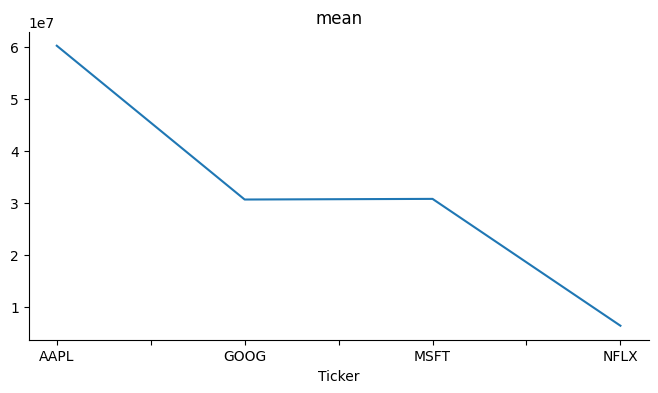

In [16]:
df_descriptive_volume['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

#2. Time Series Analysis
##Next, we’ll proceed with the Time Series Analysis to examine trends and patterns over time, focusing on the closing prices:

#Making a pivot table for each column to visualize

In [25]:
df_pivot = df.pivot(columns='Ticker', values='Close')

In [26]:
df_pivot

Ticker,AAPL,GOOG,MSFT,NFLX
Date,,,,
2023-02-07,154.649994,108.040001,267.559998,362.950012
2023-02-08,151.919998,100.000000,266.730011,366.829987
2023-02-09,150.869995,95.459999,263.619995,362.500000
2023-02-10,151.009995,94.860001,263.100006,347.359985
2023-02-13,153.850006,95.000000,271.320007,358.570007
...,...,...,...,...
2023-05-01,169.589996,107.709999,305.559998,324.119995
2023-05-02,168.539993,105.980003,305.410004,317.549988
2023-05-03,167.449997,106.120003,304.399994,319.299988


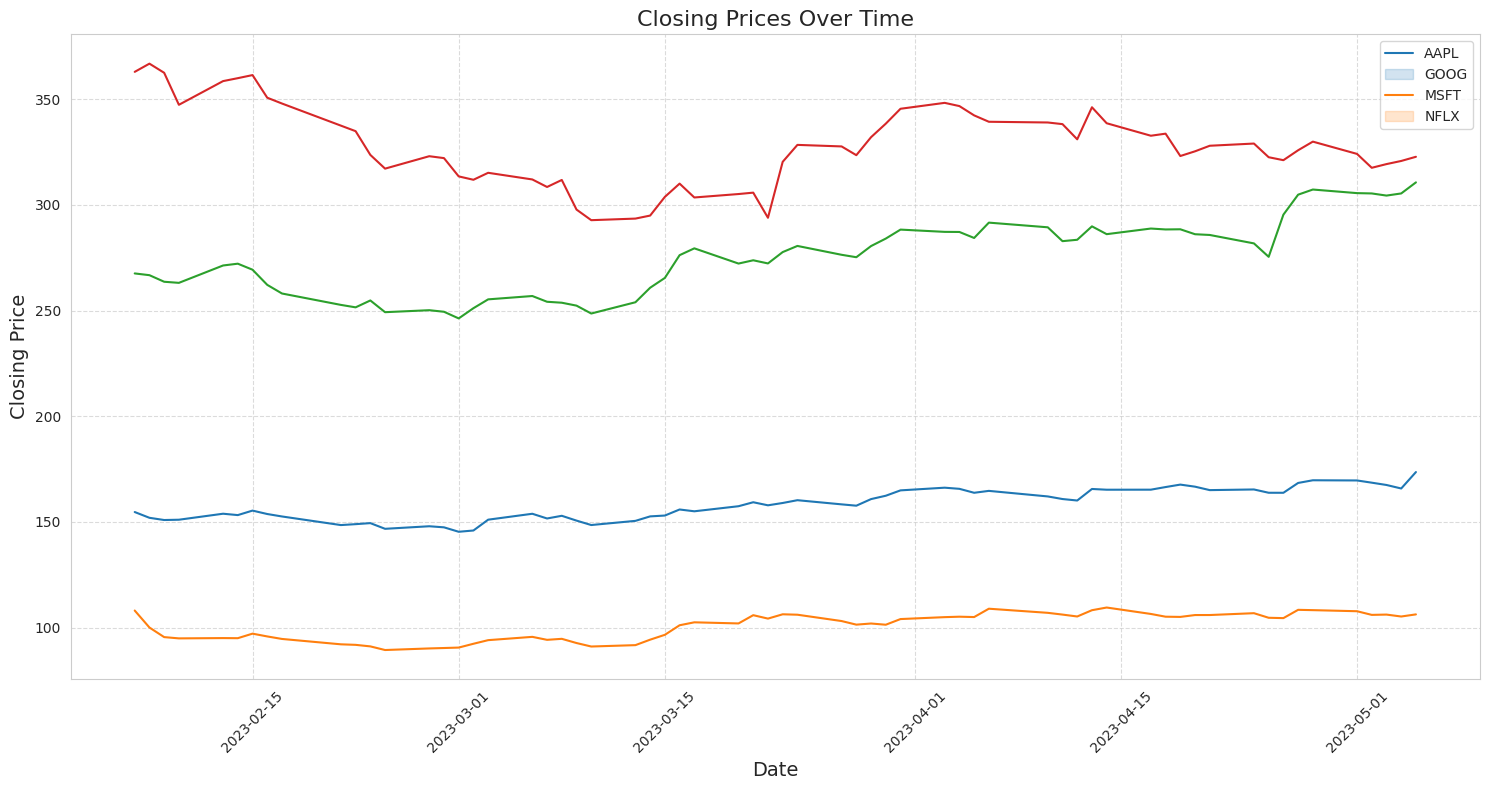

In [32]:
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_pivot, dashes=False)

# Set plot title and labels
plt.title('Closing Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines to the plot
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(df_pivot.columns, loc='upper right', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

The above plot displays the time series of the closing prices for each stock (AAPL, GOOG, MSFT, NFLX) over the observed period. Here are some key observations:

Trend: Each stock shows its unique trend over time. For instance, AAPL and MSFT exhibit a general upward trend in this period.
Volatility: There is noticeable volatility in the stock prices. For example, NFLX shows more pronounced fluctuations compared to others.
Comparative Performance: When comparing the stocks, MSFT and NFLX generally trade at higher price levels than AAPL and GOOG in this dataset.

## 3. Volatility Analysis
Next, let’s focus on Volatility Analysis. We’ll calculate and compare the volatility (standard deviation) of the closing prices for each stock. It will give us an insight into how much the stock prices fluctuated over the period:

<ipython-input-35-39a2587242a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.index, y=volatility.values, palette="viridis")


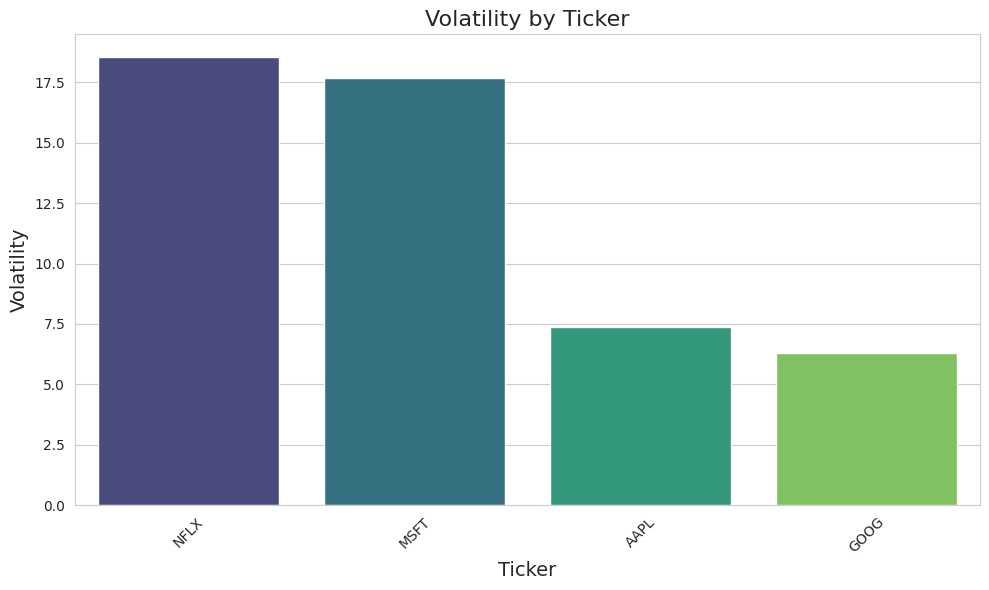

In [35]:
volatility = df_pivot.std().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values, palette="viridis")
plt.title('Volatility by Ticker', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('Volatility', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#4. Correlation Analysis
Next, we’ll perform a Correlation Analysis to understand how the stock prices of these companies are related to each other:

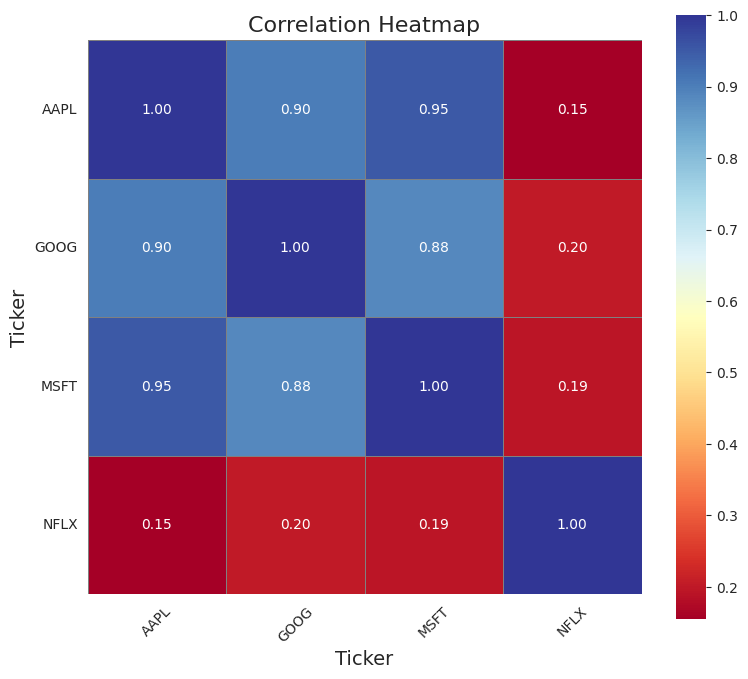

In [38]:
correlation = df_pivot.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(data=correlation,
            annot=True,  # Add annotations
            cmap='RdYlBu',  # Set color map to RdYlBu
            linewidths=0.5,  # Add lines between cells
            linecolor='gray',  # Set line color
            fmt=".2f",  # Format annotation to two decimal places
            square=True,  # Make cells square
            cbar_kws={'shrink': 0.8},  # Customize color bar size
            )
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('Ticker', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Comparative Analysis
##Now, let’s move on to Comparative Analysis. In this step, we’ll compare the performance of different stocks based on their returns over the period. We’ll calculate the percentage change in closing prices from the start to the end of the period for each stock:

In [48]:
percentage_change = ((df_pivot.iloc[-1] - df_pivot.iloc[0]) / df_pivot.iloc[0]) * 100


<Axes: xlabel='Ticker'>

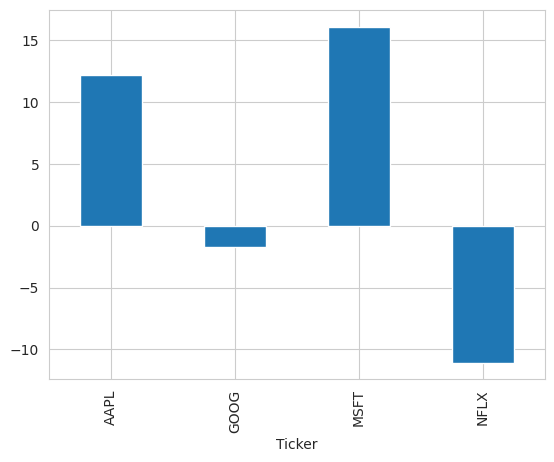

In [50]:
percentage_change.plot(kind='bar')

The bar chart and the accompanying data show the percentage change in the closing prices of the stocks from the start to the end of the observed period:

MSFT: The highest positive change of approximately 16.10%.
AAPL: Exhibited a positive change of approximately 12.23%. It indicates a solid performance, though slightly lower than MSFT’s.
GOOG: Showed a slight negative change of about -1.69%. It indicates a minor decline in its stock price over the observed period.
NFLX: Experienced the most significant negative change, at approximately -11.07%. It suggests a notable decrease in its stock price during the period.

#5. Daily Risk Vs. Return Analysis
To perform a Risk vs. Return Analysis, we will calculate the average daily return and the standard deviation of daily returns for each stock. The standard deviation will serve as a proxy for risk, while the average daily return represents the expected return.

In [51]:
daily_returns = df_pivot.pct_change().dropna()

In [52]:
daily_returns

Ticker,AAPL,GOOG,MSFT,NFLX
Date,,,,
2023-02-08,-0.017653,-0.074417,-0.003102,0.010690
2023-02-09,-0.006912,-0.045400,-0.011660,-0.011804
2023-02-10,0.000928,-0.006285,-0.001972,-0.041766
2023-02-13,0.018807,0.001476,0.031243,0.032272
2023-02-14,-0.004225,-0.000526,0.003133,0.003876
...,...,...,...,...
2023-05-01,-0.000530,-0.004713,-0.005533,-0.017610
2023-05-02,-0.006191,-0.016062,-0.000491,-0.020270
2023-05-03,-0.006467,0.001321,-0.003307,0.005511


In [53]:
average_daily_returns=daily_returns.mean()

In [54]:
average_daily_returns

Ticker
AAPL    0.001991
GOOG   -0.000067
MSFT    0.002606
NFLX   -0.001676
dtype: float64

In [55]:
average_daily_risk=daily_returns.std()

In [56]:
average_daily_risk

Ticker
AAPL    0.014152
GOOG    0.020710
MSFT    0.017881
NFLX    0.022481
dtype: float64

In [57]:
# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': average_daily_risk, 'Average Daily Return': average_daily_returns})

In [58]:
risk_return_df

,Risk,Average Daily Return
Ticker,,
AAPL,0.014152,0.001991
GOOG,0.020710,-0.000067
MSFT,0.017881,0.002606
NFLX,0.022481,-0.001676


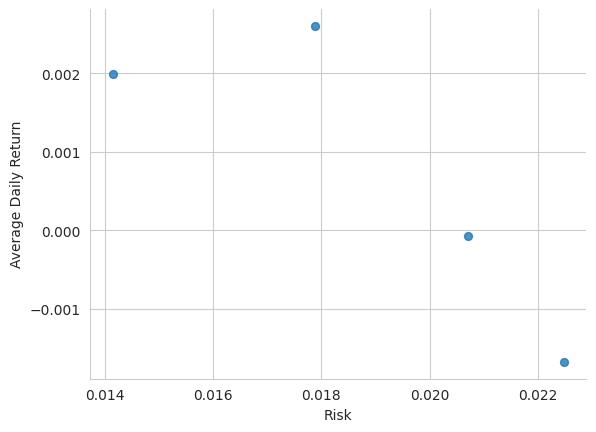

In [60]:
# @title Risk vs Average Daily Return

from matplotlib import pyplot as plt
risk_return_df.plot(kind='scatter', x='Risk', y='Average Daily Return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Risk: In the context of investments, risk refers to the uncertainty or variability of returns associated with an investment. It encompasses factors such as volatility, market fluctuations, economic conditions, and company-specific risks. Generally, higher-risk investments have a greater potential for both gains and losses.

Return: Return represents the gain or loss on an investment over a specific period, usually expressed as a percentage of the initial investment. It includes both capital appreciation (increase in asset value) and income (such as dividends or interest payments). Higher returns indicate greater profitability on an investment.

The relationship between risk and return can be summarized as follows:

Higher Risk, Higher Potential Return: In general, investments with higher levels of risk tend to offer the potential for higher returns. This is because investors demand compensation for taking on additional risk. Riskier investments need to offer higher potential returns to attract investors and compensate them for the possibility of loss.

Lower Risk, Lower Potential Return: Conversely, investments with lower levels of risk typically offer lower potential returns. Lower-risk investments, such as government bonds or high-quality corporate bonds, tend to provide more stable and predictable returns but may offer lower overall returns compared to riskier assets like stocks.

Risk Tolerance: The appropriate balance between risk and return depends on an individual's risk tolerance, investment goals, time horizon, and financial situation. Investors with a higher risk tolerance may be willing to accept greater volatility and higher potential losses in pursuit of higher returns, while more risk-averse investors may prioritize capital preservation and opt for lower-risk investments with more modest returns.

Efficient Frontier: The concept of the efficient frontier in modern portfolio theory illustrates the tradeoff between risk and return. It represents the set of optimal portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of expected return. By diversifying across assets with different risk-return profiles, investors can aim to maximize returns while minimizing risk.

Overall, the relationship between risk and return is a central consideration in investment decision-making. Investors must carefully assess their risk tolerance and investment objectives to construct a portfolio that aligns with their goals while balancing the tradeoff between risk and return.